<a href="https://colab.research.google.com/github/DomingosN/Ciencia-da-dados-aplicada-as-Organiza-es-/blob/master/Normaliza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

# Compare o efeito de diferentes _scalers_ nos dados com valores discrepantes (_outliers_)

Tradução do tutorial elaborador por Raghav RV,  Guillaume Lemaitre e Thomas Unterthiner o original pode ser consultado [aqui](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

De fato, muitos estimadores são projetados com o pressuposto de que cada atributo leva valores próximos de zero ou mais importante que todos os atributos variam em escalas comparáveis.   
Em particular, os estimadores baseados em métricas e gradientes geralmente assumem dados aproximadamente padronizados (recursos centralizados com variações de unidades).   
Uma exceção notável são os estimadores baseados em árvore de decisão que são robustos ao dimensionamento arbitrário dos dados.

Este exemplo usa _Scalers_ (escaladores),  _transformers_ (transformadores) e _normalizers_ (normalizadores) diferentes para trazer os dados para um intervalo predefinido.

Os Scaler são transformadores lineares e diferem entre si na maneira de estimar os parâmetros usados para alterar e dimensionar cada atributos.

O `QuantileTransformer` fornece transformações não lineares nas quais as distâncias entre os valores extremos e os extremos marginais são reduzidas.   

O `PowerTransformer` fornece transformações não lineares nas quais os dados são mapeados para uma distribuição normal para estabilizar a variação e minimizar a assimetria.

Diferente das transformações anteriores, a normalização refere-se a uma transformação por amostra em vez de uma transformação por recurso.



In [2]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Dados sem Escala', X),
    ('Dados após standard scaling',
        StandardScaler().fit_transform(X)),
    ('Dados após min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Dados após max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Dados após robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Dados após power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Dados após power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Dados após quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Dados após quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Dados após sample-wise L2 normalização',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


Serão mostrados dois gráficos para cada scaler / normalizador / transformador. 

A figura da esquerda mostra um gráfico de dispersão do conjunto de dados completo.

A figura da direita exclui os valores extremos, considerando apenas 99% do conjunto de dados, excluindo valores extremos marginais. 

Além disso, as distribuições marginais para cada recurso serão mostradas no lado do gráfico de dispersão.

In [0]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Renda Mediana",
                      x1_label="Numero de famílias",
                      title="dados completo")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Renda Mediana",
                      x1_label="Numero de famílias",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Mapeamento de cores de y')


Dados originais
-----------------------

Cada transformação é plotada mostrando dois recursos transformados, com a plotagem esquerda mostrando o conjunto de dados inteiro e a direita ampliada para mostrar o conjunto de dados sem os outliers marginais.   

Uma grande maioria das amostras é compactada para um intervalo específico, [0, 10] para a renda mediana e [0, 6] para o número de domicílios. Observe que existem alguns valores extremos marginais (alguns blocos têm mais de 1200 famílias).    

Portanto, um pré-processamento específico pode ser muito benéfico, dependendo da aplicação. A seguir, apresentamos algumas idéias e comportamentos desses métodos de pré-processamento na presença de valores extremos marginais.


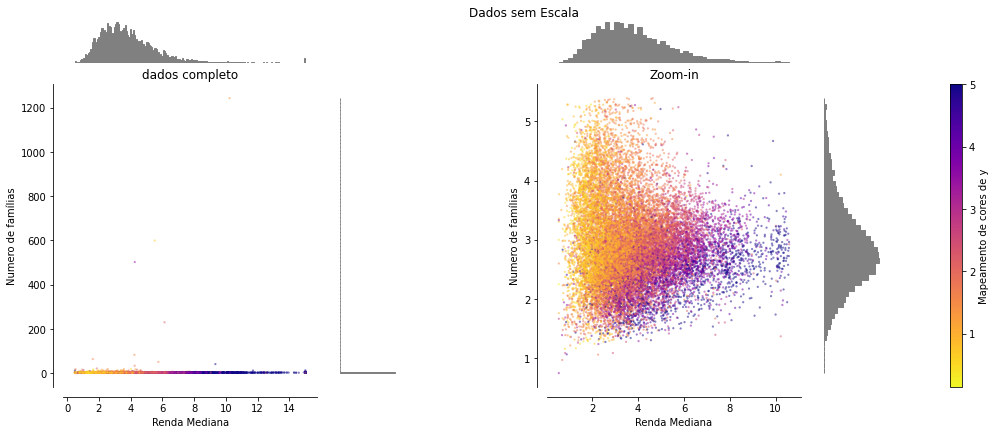

In [4]:
make_plot(0)

StandardScaler
-----------------------

O `StandardScaler` remove a média e dimensiona os dados para a variação da unidade.   

No entanto, os valores extremos influenciam o cálculo da média empírica e do desvio padrão, que diminuem a faixa dos valores dos recursos, conforme mostrado na figura à esquerda abaixo. 

Observe, em particular, que como os valores discrepantes (_outlaiers_) de cada recurso têm magnitudes diferentes, a dispersão dos dados transformados em cada recurso é muito diferente: a maioria dos dados está no intervalo [-2, 4] para o recurso de renda mediana transformada, enquanto o mesmo os dados são compactados na faixa menor de [-0,2, 0,2] para o número transformado de famílias.

Portanto, o StandardScaler não pode garantir escalas balanceadas de recursos na presença de valores discrepantes (_outlaiers_).


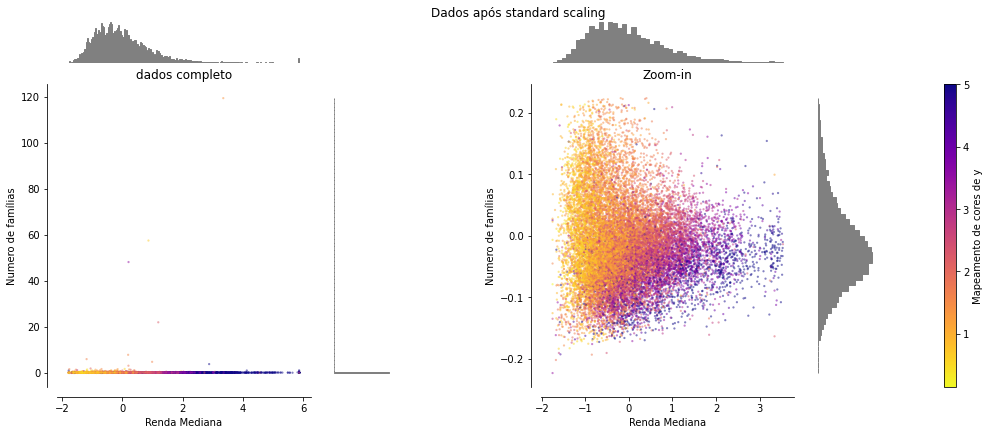

In [5]:
make_plot(1)

MinMaxScaler
------------

`` MinMaxScaler`` redimensiona o conjunto de dados de modo que todos os valores dos recursos estejam no intervalo [0, 1], como mostrado no painel direito abaixo. No entanto, essa escala comprime todos os inliers na faixa estreita [0, 0,005] para o número transformado de famílias.

Como o `` StandardScaler``, `` MinMaxScaler`` é muito sensível à presença de outliers.


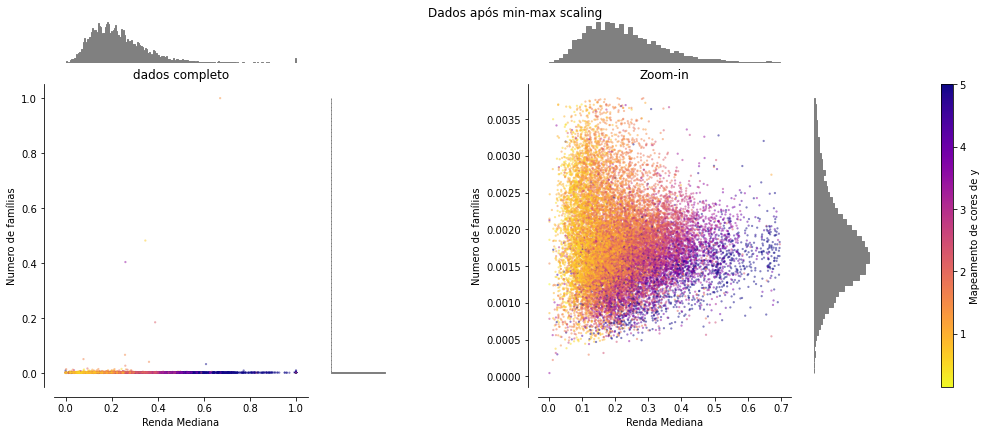

In [6]:
make_plot(2)

MaxAbsScaler
---------------------

`` MaxAbsScaler`` difere do escalador anterior, de modo que os valores absolutos são mapeados no intervalo [0, 1]. Apenas em dados positivos, esse scaler se comporta de maneira semelhante ao `` MinMaxScaler`` e, portanto, também sofre com a presença de grandes valores discrepantes.


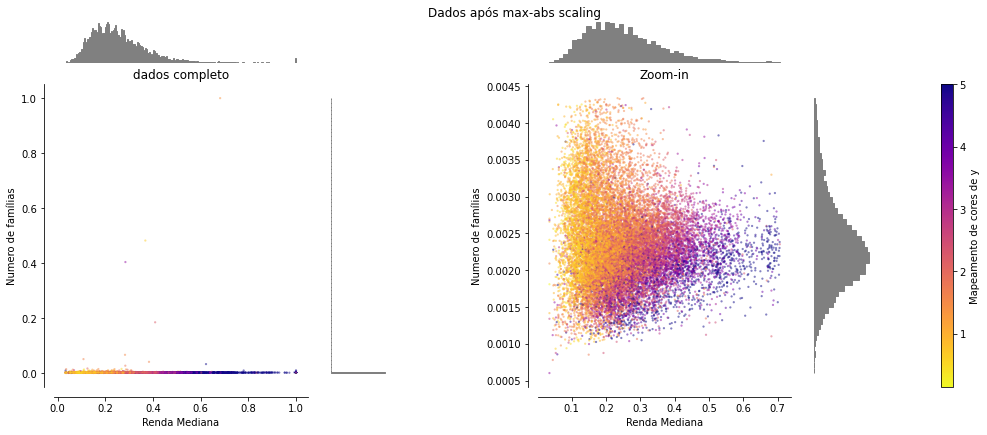

In [7]:
make_plot(3)

RobustScaler
------------

Diferentemente dos dimensionadores anteriores, as estatísticas de centralização e dimensionamento deste
O scaler é baseado em percentis e, portanto, não é influenciado por um pequeno número de valores extremos marginais muito grandes. Conseqüentemente, o intervalo resultante dos valores dos recursos transformados é maior do que nos escaladores anteriores e, mais importante, são aproximadamente semelhantes: para ambos os recursos, a maioria dos valores transformados está em um intervalo [-2, 3], como visto no zoom- na figura.
Observe que os próprios outliers ainda estão presentes nos dados transformados.



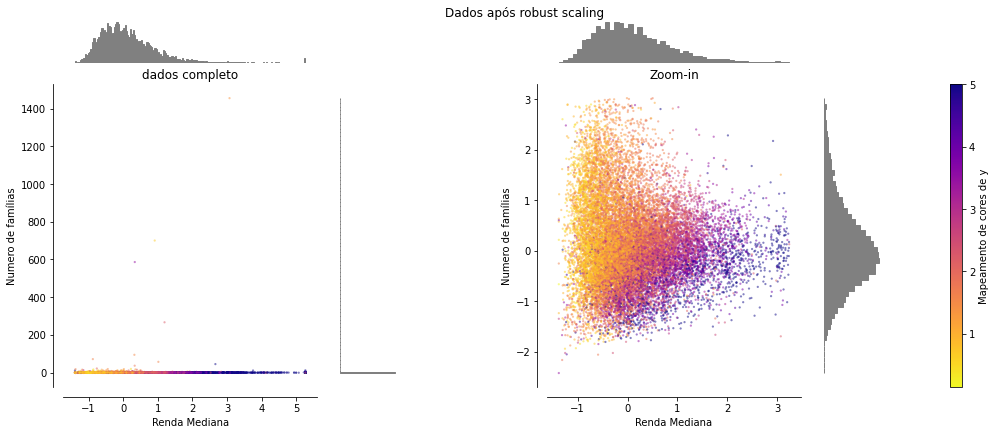

In [8]:
make_plot(4)

PowerTransformer
----------------

O `` PowerTransformer`` aplica uma transformação de energia a cada recurso para tornar os dados mais semelhantes aos gaussianos.   
Atualmente, o `` PowerTransformer`` implementa as transformações Yeo-Johnson e Box-Cox. A transformação de energia encontra o fator de escala ideal para estabilizar a variação e mimetizar a assimetria por meio da estimativa da máxima probabilidade.
Por padrão, o `` PowerTransformer`` também aplica normalização de variação de unidade com média zero à saída transformada. Observe que o Box-Cox só pode ser aplicado a dados estritamente positivos.   
A renda e o número de famílias são estritamente positivos, mas se houver valores negativos, a transformação de Yeo-Johnson é a preferida.


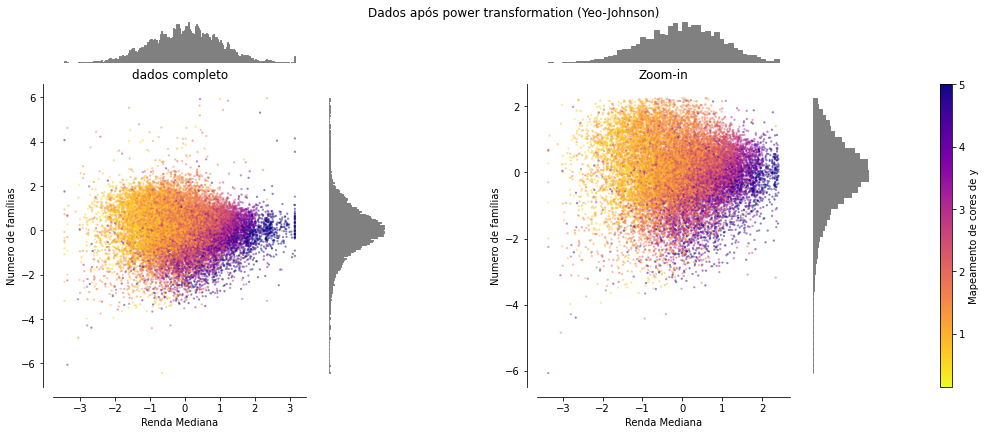

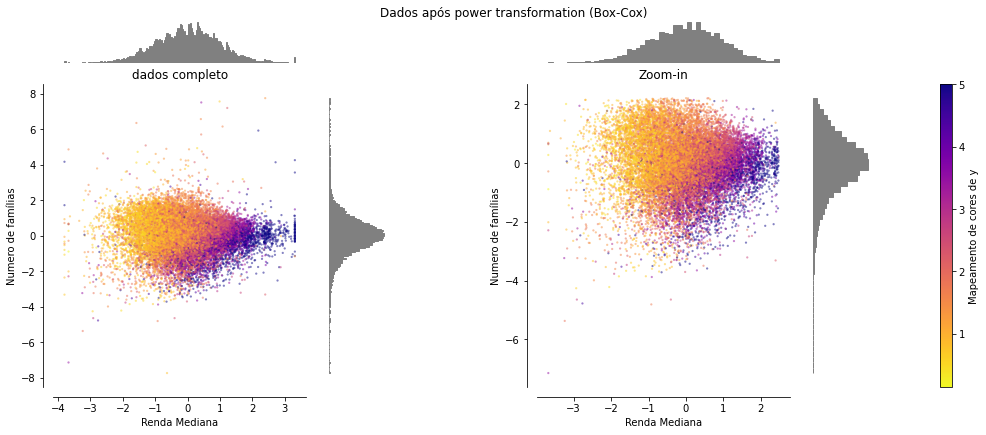

In [9]:
make_plot(5)
make_plot(6)

QuantileTransformer (Gaussian output)
-------------------------------------

`` QuantileTransformer`` possui um parâmetro `` output_distribution`` adicional que permite corresponder a uma distribuição gaussiana em vez de uma distribuição uniforme.
Observe que esse transformador não paramétrico apresenta artefatos de saturação para valores extremos.



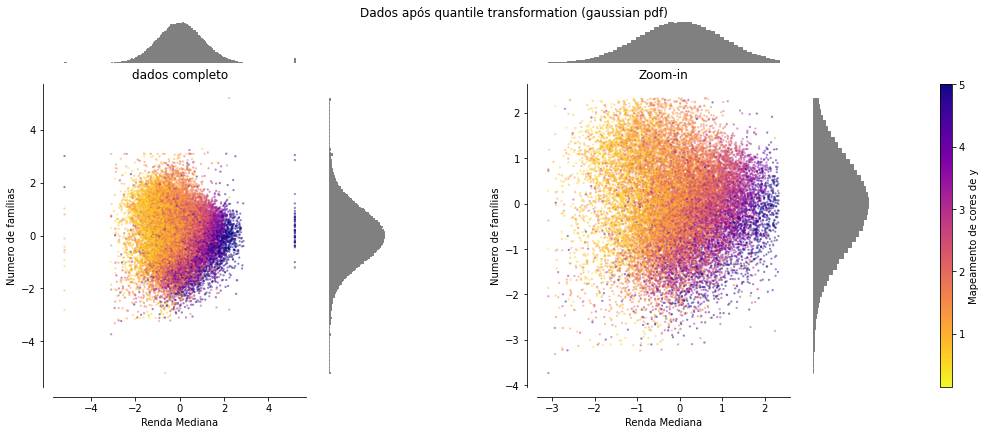

In [10]:
make_plot(7)

QuantileTransformer (saída uniforme)
------------------------------------

`` QuantileTransformer`` aplica uma transformação não linear, de modo que a função de densidade de probabilidade de cada recurso seja mapeada para uma distribuição uniforme.
Nesse caso, todos os dados serão mapeados no intervalo [0, 1], mesmo os outliers que não podem mais ser distinguidos dos inliers.

Como `` RobustScaler``, `` QuantileTransformer`` é robusto para discrepantes no
A sensação de que adicionar ou remover discrepantes no conjunto de treinamento produzirá aproximadamente a mesma transformação nos dados retidos. Mas, ao contrário de `` RobustScaler``, o `` QuantileTransformer`` também reduzirá automaticamente qualquer erro externo, configurando-o para os limites de intervalo definidos a priori (0 e 1).



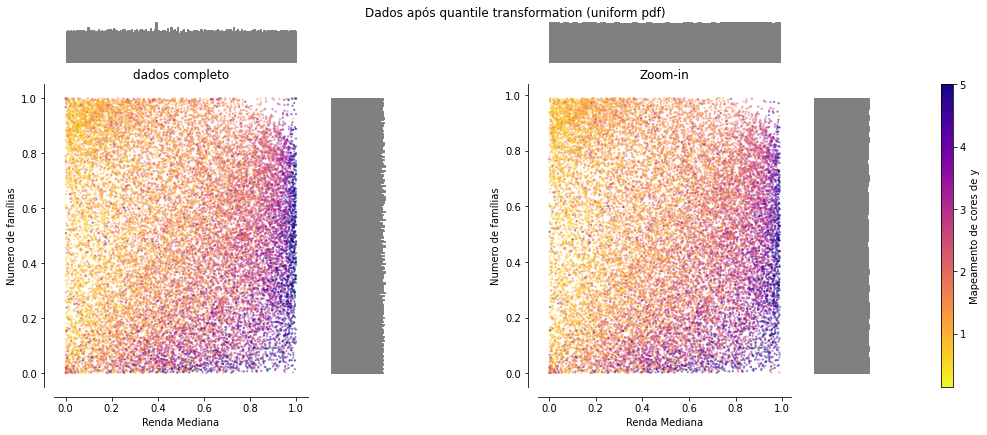

In [11]:
make_plot(8)

Normalizer
-----------------

O `` Normalizer`` redimensiona o vetor de cada amostra para ter norma de unidade, independentemente da distribuição das amostras.

Pode ser visto nas duas figuras abaixo, onde todas as amostras são mapeadas no círculo unitário. 

No nosso exemplo, os dois recursos selecionados têm apenas valores positivos; portanto, os dados transformados estão apenas no quadrante positivo.
Este não seria o caso se algumas características originais tivessem uma mistura de valores positivos e negativos.


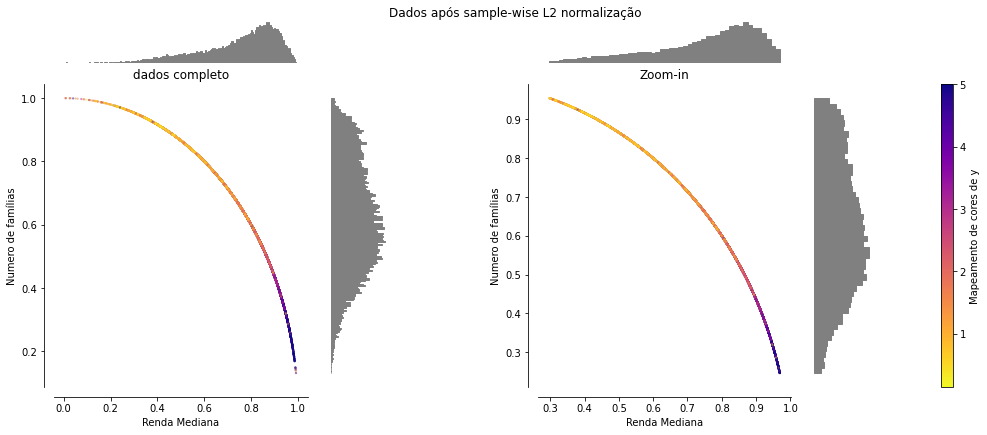

In [12]:
make_plot(9)

plt.show()